<a href="https://colab.research.google.com/github/Eruhitsuji/shika/blob/main/shika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz as gv
import os
!wget https://jp.ffonts.net/MS-Gothic.font.zip
!unzip MS-Gothic.font.zip -o
!rm MS-Gothic.font.zip

font_path = '/content/MSGOTHIC.TTF'

config_path = '/usr/share/graphviz/config6'

!cp "$font_path" /usr/share/fonts/truetype/

!dot -c

--2024-06-27 20:32:07--  https://jp.ffonts.net/MS-Gothic.font.zip
Resolving jp.ffonts.net (jp.ffonts.net)... 95.216.234.12
Connecting to jp.ffonts.net (jp.ffonts.net)|95.216.234.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2343262 (2.2M) [application/zip]
Saving to: ‘MS-Gothic.font.zip’

MS-Gothic.font.zip  100%[===================>]   2.23M  1.94MB/s    in 1.2s    

2024-06-27 20:32:09 (1.94 MB/s) - ‘MS-Gothic.font.zip’ saved [2343262/2343262]

Archive:  MS-Gothic.font.zip
 _______  _______                                                    
(_______)(_______)                 _                             _   
 _____    _____     ___   ____   _| |_   ___     ____   _____  _| |_ 
|  ___)  |  ___)   / _ \ |  _ \ (_   _) /___)   |  _ \ | ___ |(_   _)
| |      | |      | |_| || | | |  | |_ |___ | _ | | | || ____|  | |_ 
|_|      |_|       \___/ |_| |_|   \__)(___/ (_)|_| |_||_____)   \__)

Download free fonts from www.ffonts.net !
caution: filename not matc

In [2]:
!pip install transitions

In [3]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [4]:
import io
from IPython.display import Image, display
from transitions.extensions import GraphMachine
import collections
import random

class markovModel():

  class Matter(object):
    def __init__(self, filename=None):
      if (filename is None):
          self.output = io.BytesIO()
      else:
          self.output = filename

    def action_output_graph(self, *args, **kwargs):
      self.get_graph(*args, **kwargs).draw(self.output, prog='dot', format='png')
      if isinstance(self.output, io.BytesIO):
        display(Image(self.output.getvalue()))
        self.output.seek(0)

  def __init__(self,s):
    self.__s=s
    self.__start=s[0]
    self.__now_state=s[0]

    s_len=len(s)
    all_transitions=collections.Counter([(s[i%s_len],s[(i+1)%s_len]) for i in range(s_len)])

    self.__states=list(set(list(s)))
    self.__transitions_model=[]
    self.__transitions=[]
    for si in self.__states:
      tmp_key=[]
      si_sum=0
      for key in all_transitions:
        if(key[0]==si):
          tmp_key.append(key)
          si_sum+=all_transitions[key]
      for key in tmp_key:
        d={
          "trigger":all_transitions[key]/si_sum,
          "source":key[0],
          "dest":key[1],
        }
        self.__transitions.append(d.copy())
        d["trigger"]=str(d["trigger"])
        self.__transitions_model.append(d)


    self.__model = self.Matter()
    self.__machine = GraphMachine(model=self.__model, states=self.__states, transitions=self.__transitions_model, initial=self.__start, auto_transitions=False, ordered_transitions=False)

  def __getlistTransitionsOfState(self,state):
    return [t for t in self.__transitions if t["source"]==state]

  def getStates(self):
    return self.__states
  def getTransitions(self):
    return self.__transitions
  def getNowState(self):
    return self.__now_state
  def getMachine(self):
    return self.__machine
  def output_graph(self,*x):
    return self.__model.action_output_graph(*x)

  def oneStep(self,rand_func=random.random):
    l=self.__getlistTransitionsOfState(self.__now_state)
    rand=random.random()
    sum=0
    for li in l:
      sum+=li["trigger"]
      if(sum>rand):
        self.__now_state=li["dest"]
        break

    if(sum==0):
      return None
    return self.__now_state

  def run(self,n):
    l=[self.__now_state]
    for i in range(n):
      tmp=self.oneStep()
      l.append(tmp)
    return l

  def reset(self):
    self.__now_state=self.__start


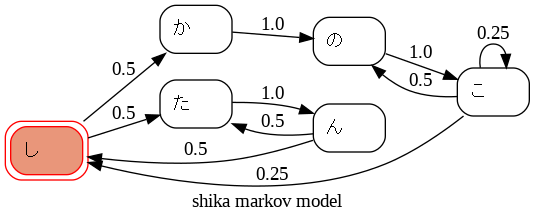

しかのこしかのこのこのこしたんたんたんしか


In [5]:
mm=markovModel("しかのこのこのここしたんたん")
mm.output_graph("shika markov model")
print("".join(mm.run(20)))